# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [708]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

plt.style.use("seaborn") #setting plot style

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}).$$ <b>Hint:</b> The function input is a vector of labels and the function should return the entropy. (Use the logarithm with base 2. In principle, any base for the logarithm can be used. Changing the base will just change the unit of information. Computer scientists like to use the base 2. In this case information is measured in bits.)

In [709]:
def entropy(y):
    ### WRITE YOUR CODE HERE ###
    if (y.size == 0): #check if array is empty
        return 0 #array is empty and we can not calculate the entropy
    list = [] #list to seperate all different elemnts
    S = 0 #variable to calculate entropy
    copy = y.copy() #copy of the array so we can sort it without altering the data
    copy.sort() #sort the array
    before = None #variable to check if the element from the last iteration is the same
    tmp = [] #temporary list to collect all elements that have the same value
    for i in copy: #loop through the sorted array
        if before == None: #first iteration
            before = i #remember the value for the next iteration
            tmp.append(i) #add value to the list
            continue
        if before == i: #value is the same as the one from the last iteration
            tmp.append(i) #add value to the same list
            continue
        if before != i: #value is now different as the one from the last iteration
            list.append(tmp) #add temporary list to the result list
            tmp = [i] #create new temporary list with new value
            before = i #remember the value for the next iteration
    list.append(tmp) #add last temporary list to the result list
    for i in list: #loop through all generated subsets
        p = len(i)/y.size #calculate probability of the value in the array
        S -= p * np.log2(p) #calculate entropy
    return S #return entropy


Check if your solution is correct:

In [710]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert str(entropy(np.array([1,1,0,0,1,1])))[:8] == "0.918295"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [2,4,3,1,5]$ and label $y=[1,0,0,0,0]$ would result in the lists 
* $x_{right} = [4,3,5]$, $y_{right} = [0,0,0]$ (for $x > t$) and
* $x_{left} = [2,1]$, $y_{left} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0]) - ((0.4 * \textbf{entropy}([1,0]))+(0.6 * \textbf{entropy}([0,0,0])))$

In [711]:
def info_gain(x,y,t):
    ### WRITE YOUR CODE HERE ###
    y_left = [] #list for the left side values
    y_right = [] #list for the right side values
    for i in range(0,x.size): #loop through array
        if(x[i] > t): #check if value is greater than threshold
            y_right.append(y[i]) #greater than threshold
        else:
            y_left.append(y[i]) #leq than treshold
    p_left = len(y_left)/y.size #calculate probability of left side
    p_right = len(y_right)/y.size #calculate probability of right side
    #calculate information gain and return it
    return entropy(y) - ((p_left * entropy(np.array(y_left))) + (p_right * entropy(np.array(y_right))))

Check if your solution is correct:

In [712]:
try:
    assert str(info_gain(np.array([5,2,3,44,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "0.609986"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))[:8] == "0.108031"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))[:8] == "0.395815"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "1.0"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))[:8] == "0.609986"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets (the two returned variables should be named 'X' and 'label'). The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="./figures/dataset.png" width="600"/>

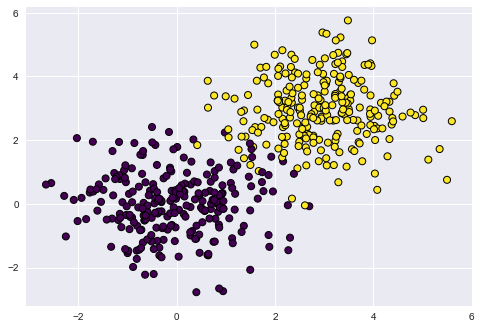

In [713]:
from curses import color_pair
from sklearn.datasets import make_blobs
### WRITE YOUR CODE HERE ###
X, label = make_blobs(n_samples=500, centers=[(0,0),(3,3)], n_features=2, random_state=0) # You need to modify this line
x = [] #list to collect all x coordinates
y = [] #list to collect all y coordinates
for i in X: #loop throgh datapoint of vectors
    x.append(i[0]) #collect x coordinate
    y.append(i[1]) #collect y coordinate
x = np.array(x) #cast to numpy array
y = np.array(y) #cast to numpy array
plt.scatter(x,y, c=label, edgecolor="black", linewidth=1, cmap="viridis") #create scatter plot
plt.show() #display the plot

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [714]:
def find_best_split(x,y):
    ### WRITE YOUR CODE HERE ###
    best = 0 #variable to remember the best threshold
    for i in range(1,x.size): #loop through all possible thrsholds
        if (info_gain(x,y,best) < info_gain(x,y,i)): #check if the information gain is bigger
            best = i #set new best threshold
    return best #return the best threshold

Check if your solution is correct:

In [715]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:

<img src="./figures/split.png" width="600"/>

* Which split would you prefer, and why?

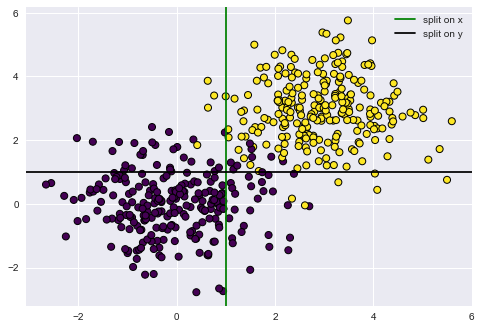

In [716]:
x_best = find_best_split(X[:,0],label)
y_best = find_best_split(X[:,1],label)
### WRITE YOUR CODE HERE ###
plt.scatter(X[:,0],X[:,1], c=label, edgecolor="black", linewidth=1, cmap="viridis") #create scatter plot
plt.axvline(x=x_best,color="green",label="split on x") #vertical line plot at x_best
plt.axhline(y=y_best,color="black",label="split on y") #horizontal line plot at y_best
plt.legend(loc="upper right") #add legend
plt.show() #display plot


## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [717]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X, label)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:

<img src="./figures/dec.png" width="600"/>

* Can you find learning parameters for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

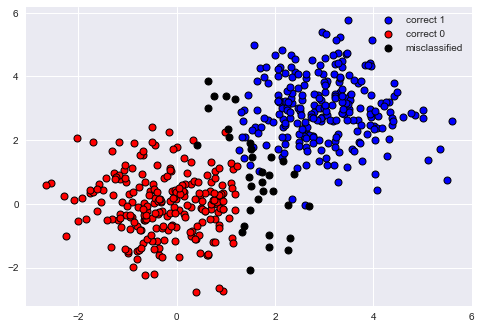

In [718]:
### WRITE YOUR CODE HERE ###
prediction = clf_tree.predict(X) #make prediction
correct_0 = [] #list to collect all correct 0
correct_1 = [] #list to collect all correct 1
misclassified = [] #list to collect all misclassified
for i in range(0,prediction.size): #loop through predictions
    if prediction[i] != label[i]: #check if vector is misclassified
        misclassified.append(X[i]) #classify vector as misclassified
        continue
    if prediction[i] == 0: #check if prediction was 0
        correct_0.append(X[i]) #prediction must be correct 0
        continue
    correct_1.append(X[i]) #prediction must be correct 1
correct_0 = np.array(correct_0) #cast to numpy array
correct_1 = np.array(correct_1) #cast to numpy array
misclassified = np.array(misclassified) #cast to numpy array
#make scatter plot for the correct 1 vectors
plt.scatter(correct_1[:,0],correct_1[:,1],color="blue", edgecolor="black", linewidth=1, label="correct 1")
#make scatter plot for the correct 0 vectors
plt.scatter(correct_0[:,0],correct_0[:,1],color="red", edgecolor="black", linewidth=1, label="correct 0")
#make scatter plot for the misclassified vectors
plt.scatter(misclassified[:,0],misclassified[:,1], color="black", edgecolor="black",
 linewidth=1, label="misclassified")
plt.legend(loc="upper right") #add legend to the plot
plt.show() #display the plot
